In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import yfinance as yfin
import constants as cs
import Dates as dates 
import payoff as pf
import GBM as gbm

%reload_ext autoreload
%autoreload 2



In [5]:


def getdata():
    data = yfin.download(['LONN.SW', 'SIKA.SW'], period= 'max')['Adj Close']
    data.index = data.index.tz_localize(None)
    data = data.loc[cs.initial_fixing_date: cs.final_fixing_date]
    return data 

data = getdata()

data




[*********************100%***********************]  2 of 2 completed


Ticker,LONN.SW,SIKA.SW
Date,,
2023-04-27,542.120483,237.429871
2023-04-28,546.263367,242.368103
2023-05-02,545.868896,239.800232
2023-05-03,574.079590,241.479218
2023-05-04,572.895935,242.071823
...,...,...
2024-07-24,522.599976,262.000000
2024-07-25,559.799988,258.500000
2024-07-26,581.000000,262.000000


In [12]:
params_product = {
    'Denomination': 1000,
    'Coupon_Rate': (0.08 / 4) ,  # Quarterly coupon payments
}

In [13]:
Tlist = dates.num_business_days(cs.initial_fixing_date, cs.final_fixing_date)
present_value_list = []
indexlist = []

In [19]:
import warnings
warnings.filterwarnings("ignore")
date_list = dates.get_list_dates(cs.initial_fixing_date, cs.final_fixing_date)
date_list = pd.Series(date_list)
date_list = date_list.tail(10).tolist()



T = date_list
present_value_list = []
for fdos in T:  
    print(fdos)
    sim_T = gbm.multi_asset_gbm_n_sims(plot= False, plotasset=False, nsims=cs.n_sims, data = data, fdos=fdos)
    lonza_path = sim_T.iloc[:, ::2]
    sika_path = sim_T.iloc[:, 1::2]
    payoff_T = pf.payoff(lonza_path, sika_path, params_product, fdos)
    expected_payoff = np.mean(payoff_T)
    present_value = expected_payoff * np.exp(-(0.018)/252*(dates.num_business_days(fdos, cs.final_fixing_date)))
    present_value_list.append(present_value)



2024-07-17 00:00:00
2024-07-18 00:00:00
2024-07-19 00:00:00
2024-07-22 00:00:00
2024-07-23 00:00:00
2024-07-24 00:00:00
2024-07-25 00:00:00
2024-07-26 00:00:00
2024-07-29 00:00:00
2024-07-30 00:00:00


<Axes: >

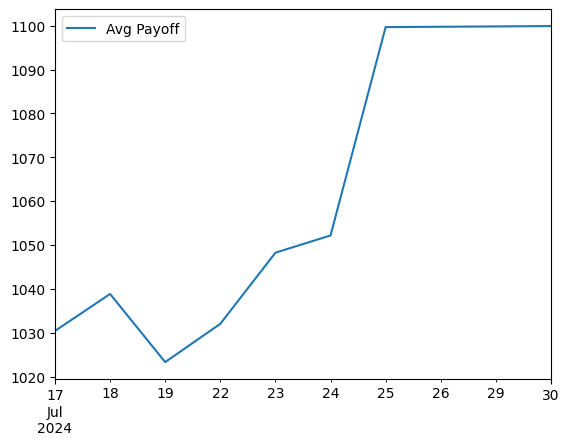

In [20]:
present_value_df = pd.DataFrame({'Avg Payoff': present_value_list}, index=T)
present_value_df.plot()

# Variance Reduction 
## Control Variate 

In [ ]:
import VarianceRedFunc as vr

S1_t = lonza_path